<a href="https://colab.research.google.com/github/hnk1203/data-augmentation/blob/main/AutoDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!pip install git+https://github.com/ildoonet/pytorch-randaugment

  Cloning https://github.com/ildoonet/pytorch-randaugment to /tmp/pip-req-build-eph3slga
  Running command git clone --filter=blob:none --quiet https://github.com/ildoonet/pytorch-randaugment /tmp/pip-req-build-eph3slga
  Resolved https://github.com/ildoonet/pytorch-randaugment to commit 48b8f509c4bbda93bbe733d98b3fd052b6e4c8ae
  Preparing metadata (setup.py) ... done


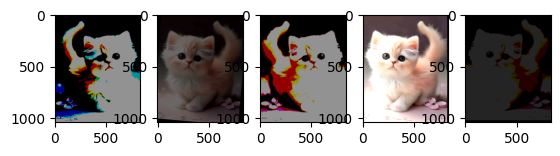

In [104]:
import torch  # 파이토치 라이브러리 임포트
from torchvision import transforms  # torchvision 라이브러리에서 transforms 모듈 임포트
from RandAugment import RandAugment  # RandAugment 모듈 임포트
from PIL import Image  # PIL 라이브러리에서 Image 모듈 임포트

# 정규화를 위한 평균과 표준 편차 정의 (임의의 값 사용)
_CIFAR_MEAN = [0.1, 0.1, 0.1]  # 이미지 정규화를 위한 평균값
_CIFAR_STD = [0.7, 0.7, 0.7]  # 이미지 정규화를 위한 표준 편차값

# RandAugment를 위한 N과 M 정의 (임의의 값 사용)
N = 3  # 적용할 변환의 수
M = 5  # 변환의 강도

# 변환 정의
transform_train = transforms.Compose([
    # transforms.RandomCrop(32, padding=4),  # 랜덤으로 이미지를 크롭하는 변환
    transforms.RandomHorizontalFlip(),  # 랜덤으로 이미지를 수평으로 뒤집는 변환
    RandAugment(N, M),  # RandAugment를 변환에 추가
    transforms.ToTensor(),  # 이미지를 텐서로 변환하는 변환
    transforms.Normalize(_CIFAR_MEAN, _CIFAR_STD),  # 이미지를 정규화하는 변환
])

# 이미지 로드 및 변환 적용
image_path = "/content/고먐미.png"  # 이미지 파일의 경로
image = Image.open(image_path).convert('RGB')  # 이미지 파일 열기 및 RGB 포맷으로 변환

# 변환된 이미지를 반복하여 시각화
for i in range(0,5):
    transformed_image = transform_train(image)  # 정의한 변환을 이미지에 적용

    # 이미지 시각화
    import matplotlib.pyplot as plt  # matplotlib 라이브러리 임포트
    plt.subplot(1, 5, i+1)  # 이미지를 가로로 배열
    plt.imshow(transformed_image.permute(1, 2, 0))  # 변환된 이미지를 시각화
    plt.axis('on')  # 축 표시
plt.show()  # 이미지 출력
